<a href="https://colab.research.google.com/github/MigaraThiyunuwan/Basic-CRUD-operations-Laravel/blob/main/Cardio_Predict_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/cardio_train.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
dataset = df.values

In [ ]:
df.shape

(70000, 13)

In [ ]:
df=df.drop(["id"],axis=1)

In [ ]:
df.shape

(70000, 12)

In [ ]:
dataset = df.values

In [ ]:
Y = dataset[:,11]

In [ ]:
X = dataset[:,0:11]

In [ ]:
X

array([[1.8393e+04, 2.0000e+00, 1.6800e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0228e+04, 1.0000e+00, 1.5600e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.8857e+04, 1.0000e+00, 1.6500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9066e+04, 2.0000e+00, 1.8300e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.2431e+04, 1.0000e+00, 1.6300e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0540e+04, 1.0000e+00, 1.7000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [ ]:
X.shape

(70000, 11)

In [ ]:
Y.shape

(70000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=32)

In [ ]:
X_train.shape

(56000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # train and transform
X_test = scaler.transform(X_test) # only transform

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

In [ ]:
model = Sequential()
model.add(Dense(units=11,activation='relu',input_dim=11)) #input layer
model.add(Dense(units=22,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=8,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1,activation='sigmoid')) # output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,Y_train,epochs=100, batch_size=64,validation_split=0.1)

Epoch 1/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6711 - loss: 0.6127 - val_accuracy: 0.7261 - val_loss: 0.5687
Epoch 2/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7280 - loss: 0.5537 - val_accuracy: 0.7318 - val_loss: 0.5503
Epoch 3/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7299 - loss: 0.5522 - val_accuracy: 0.7336 - val_loss: 0.5480
Epoch 4/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7293 - loss: 0.5477 - val_accuracy: 0.7302 - val_loss: 0.5640
Epoch 5/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7330 - loss: 0.5479 - val_accuracy: 0.7371 - val_loss: 0.5471
Epoch 6/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7319 - loss: 0.5463 - val_accuracy: 0.7348 - val_loss: 0.5621
Epoch 7/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7264 - loss: 0.5532 - val_accuracy: 0.7339 - val_loss: 0.5450
Epoch 8/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7345 - loss: 0.5429 - val_accu

In [ ]:
model.evaluate(X_test,Y_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7261 - loss: 0.5465


[0.5429674983024597, 0.7334285974502563]

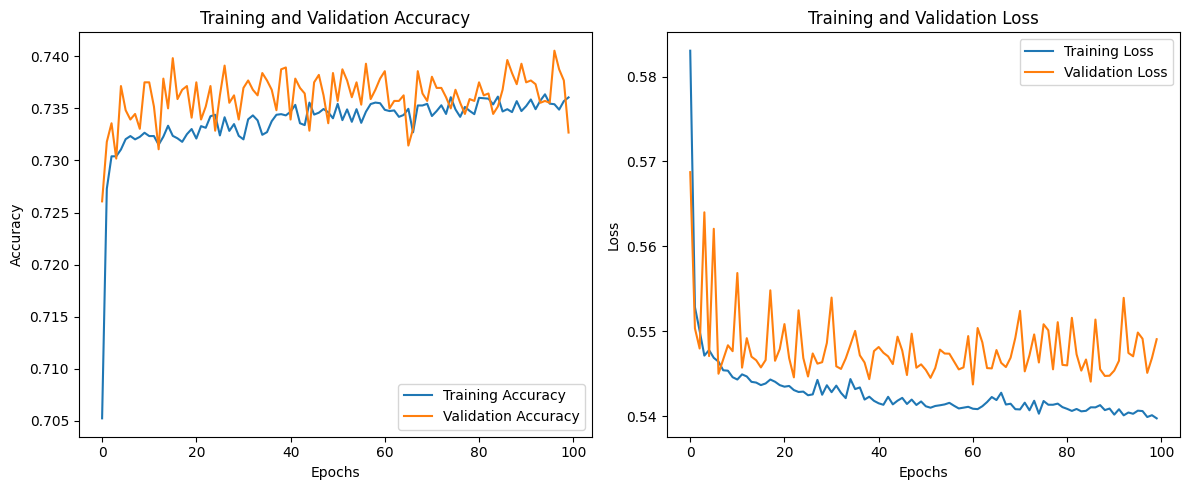

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
